<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
#Загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
#Загрузим данные
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
#Проверим есть ли в данных дубликаты
df.duplicated().value_counts()

False    4847
True      153
dtype: int64

In [7]:
#Удалим дубликаты
df.drop_duplicates(inplace=True)

Пропусков и дубликатов в данных нет. 

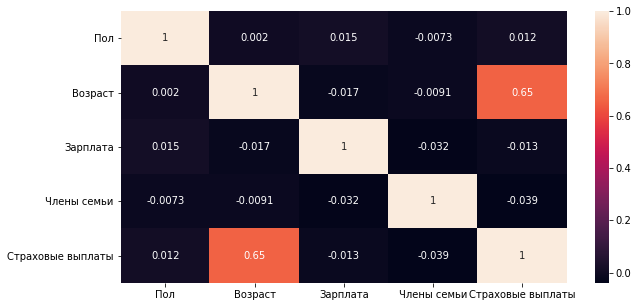

In [8]:
#Построим корреляционную матрицу
corrMatrix = df.corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Вывод:**
Пропусков и дубликатов в данных нет. 
Корреляций не выявила значительных зависимостей между признаками. Есть довольно высокая корреляция между возрастом и страховыми выплатами, но это вполне логично.
Целевой признак для дальнейшего обучения модели: Страховые выплаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регресии не изменится.

**Обоснование:** 
Для обоснования ответа получим предсказания для домноженных признаков. Умноженная матрица будет иметь вид X * P

Умножим признаки на обратимую матрицу $P$:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке:

$$
w_1 = (P^T X^T XP)^{-1} P^T X^T y
$$

Используя формулу:

$$
(A * B)^{-1} = B^{-1} * A^{-1}
$$

где $A$ и $B$ квадратные матрицы

$P$, $P^T$ и $X^T X$ тоже квадратные 

$$
w_1= P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Умножение матрицы на обратную матрицу равно единичной матрице:

$$
w_1= P^{-1} (X^T X)^{-1} I X^T y
$$

Умножение любой матрицы на единичную равно этой самой матрице:

$$
w_1= P^{-1} (X^T X)^{-1} X^T y
$$

$$
a_1 = XPw_1\
$$

$$
a_1 = X P P^{-1} (X^T X)^{-1} X^T y
$$

$$
a_1 = X (X^T X)^{-1} X^T y
$$
Произведение $X (X^T X)^{-1} X^T y$ равно $Xw$, тогда получаем:
$$
a_1 = Xw
$$
В итоге мы получили исходную формулу предсказаний, значит домножение признаков на обратимую матрицу не влияет на предсказания модели.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу P размером 4х4. Дважды обучим модель линейной регрессии до и после преобразования и посчитаем метрику R2 для обоих случаев.

**Обоснование**

Как было показано в предыдущем пункте, домножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны.

In [9]:
#Разобьем data на признаки и целевой признак
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [10]:
#Создадим обратимую квадратную матрицу со случайными числами размерностью столбцов features
state = np.random.RandomState(12345)
matrix_cr=np.random.normal(size=(features.shape[1],features.shape[1]))

In [11]:
#Зашифруем даннные путем умножения матриц
features_cr=features @ matrix_cr
features_cr

,0,1,2,3
0,19343.880942,68486.532861,-24813.959718,10044.954215
1,14828.670008,52445.647092,-18999.725432,7697.084184
2,8196.796378,28977.506975,-10497.507711,4253.551016
3,16254.365166,57600.848036,-20870.707392,8445.701745
4,10183.070490,36027.486336,-13053.077338,5285.394775
...,...,...,...,...
4995,13922.043707,49296.023972,-17860.303944,7231.048218
4996,20429.262483,72369.205951,-26221.203224,10612.455746
4997,13215.990637,46821.449841,-16964.527471,6866.224813
4998,12751.037179,45157.970195,-16361.862634,6622.954676


## Проверка алгоритма

In [12]:
#Обучим модель линейной регрессии на исходных данных
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target,predictions))

R2: 0.4302010044852066


In [14]:
#Обучим модель линейной регрессии на зашифрованных данных
model = LinearRegression()
model.fit(features_cr, target)
predictions = model.predict(features_cr)
print('R2:', r2_score(target,predictions))

R2: 0.4302010044852431


**Вывод:** Метрики R2 обеих моделей одиннаковые, следовательно умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования. 